In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
os.chdir("D:/Innomatics")

In [4]:
df=pd.read_csv("Historical_train.csv")
df.head()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,30992,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,64361,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,8985,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [5]:
df1=pd.read_csv("Historical_test_without_target.csv")
df1.head()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,36640,38309,Historical,114538,S,2,1,1349864,122.20,2003,25,16.24,10.94
1,24484,25026,Historical,259365,D,6,1,410348,56.00,2003,51,127.72,29.94
2,64696,72200,Historical,147658,S,1,0,92099,84.95,2011,20,0.00,0.00
3,65090,72652,Historical,148208,S,5,1,801001,185.95,2004,21,4.33,86.83
4,32653,33380,Historical,124687,D,2,1,1051302,65.00,2006,60,26.80,28.99


In [6]:
df.shape

(53197, 14)

In [7]:
df1.shape

(22799, 13)

In [8]:
df.describe()

,Unnamed: 0,Order,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
count,53197.000000,53197.000000,5.319700e+04,53197.000000,53197.00000,5.319700e+04,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000
mean,38048.424498,41705.437224,6.526196e+05,4.125797,0.78824,1.216757e+06,99.004026,2005.971389,43.941651,56.455537,47.335423,0.171006
std,21931.593783,25035.602066,6.873272e+05,3.895184,0.40856,1.524907e+06,80.631333,6.098045,37.515901,99.006290,139.049743,0.376518
min,0.000000,2.000000,5.000100e+04,0.000000,0.00000,6.800000e+01,0.000000,1945.000000,0.000000,0.000000,0.000000,0.000000
25%,19060.000000,19504.000000,1.700050e+05,2.000000,1.00000,2.432250e+05,49.950000,2003.000000,22.000000,20.190000,18.710000,0.000000
50%,38002.000000,41578.000000,5.409570e+05,3.000000,1.00000,7.155000e+05,78.950000,2007.000000,34.000000,44.000000,36.080000,0.000000
75%,57052.000000,63555.000000,7.597100e+05,6.000000,1.00000,1.552432e+06,127.950000,2010.000000,53.000000,79.590000,56.980000,0.000000
max,75995.000000,85106.000000,3.959831e+06,99.000000,1.00000,1.666966e+07,3986.310000,2016.000000,1426.000000,14140.210000,19138.790000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53197 entries, 0 to 53196
Data columns (total 14 columns):
Unnamed: 0          53197 non-null int64
Order               53197 non-null int64
File_Type           53197 non-null object
SKU_number          53197 non-null int64
MarketingType       53197 non-null object
ReleaseNumber       53197 non-null int64
New_Release_Flag    53197 non-null int64
StrengthFactor      53197 non-null int64
PriceReg            53197 non-null float64
ReleaseYear         53197 non-null int64
ItemCount           53197 non-null int64
LowUserPrice        53197 non-null float64
LowNetPrice         53197 non-null float64
SoldFlag            53197 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 5.7+ MB


In [10]:
df.isnull().sum()

Unnamed: 0          0
Order               0
File_Type           0
SKU_number          0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
SoldFlag            0
dtype: int64

### Data cleaning

In [11]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
train_df=df.copy()
test_df=df1.copy()

In [14]:
train_df.head()
test_df.head()

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,38309,Historical,114538,S,2,1,1349864,122.20,2003,25,16.24,10.94
1,25026,Historical,259365,D,6,1,410348,56.00,2003,51,127.72,29.94
2,72200,Historical,147658,S,1,0,92099,84.95,2011,20,0.00,0.00
3,72652,Historical,148208,S,5,1,801001,185.95,2004,21,4.33,86.83
4,33380,Historical,124687,D,2,1,1051302,65.00,2006,60,26.80,28.99


## Data visualization

In [15]:
#fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
#s_cat=train_df[train_df['MarketingType']=='S']
#d_cat=train_df[train_df['MarketingType']=='D']
#ax = sns.distplot(s_cat[(s_cat['SoldFlag']==1)], bins=18, label = 'Sold', ax = axes[0], kde =False)
#ax = sns.distplot(s_cat[s_cat['SoldFlag']==0], bins=40, label = 'Not Sold', ax = axes[0], kde =False)
#ax.legend()
#ax.set_title('S category products')
#ax = sns.distplot(d_cat[d_cat['SoldFlag']==1], bins=18, label = 'Sold', ax = axes[1], kde =False)
#ax = sns.distplot(d_cat[d_cat['SoldFlag']==0], bins=40, label = 'Not Sold', ax = axes[1], kde =False)
#ax.legend()
#ax.set_title('D category products')

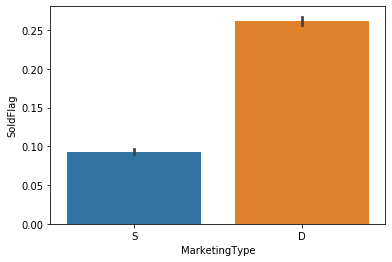

In [16]:
sns.barplot('MarketingType','SoldFlag',data=df)

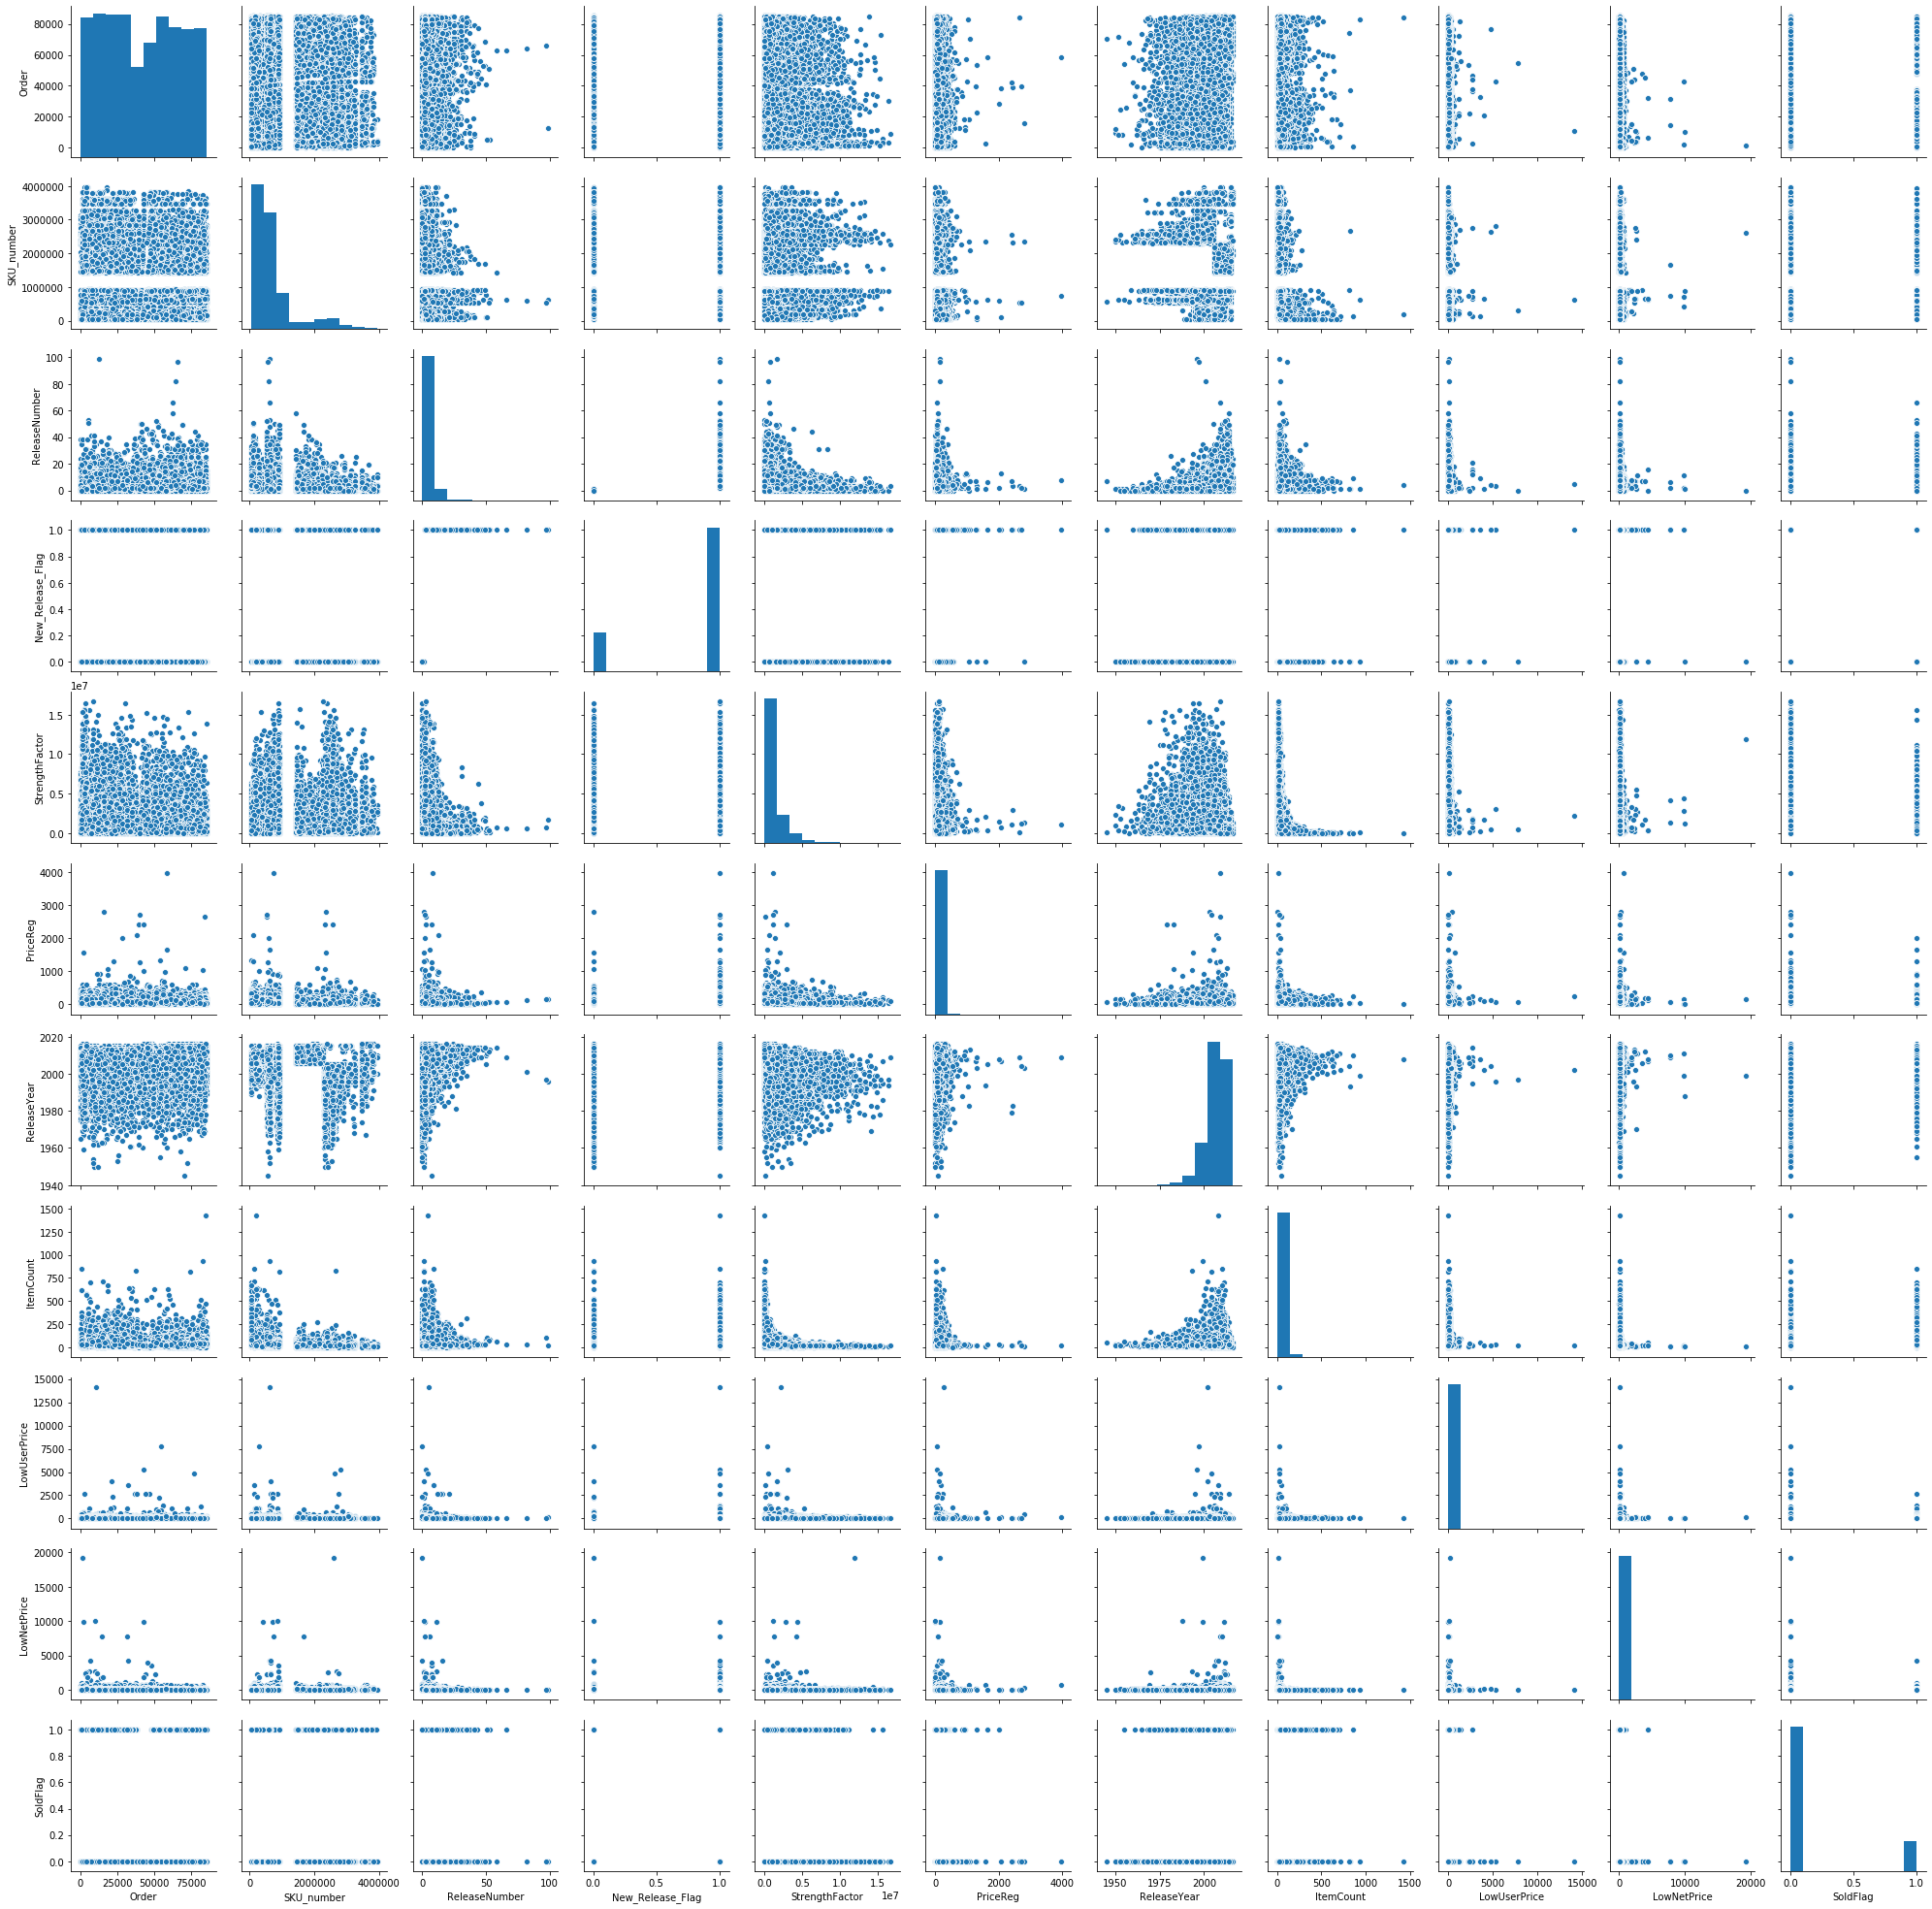

In [18]:
sns.pairplot(df)

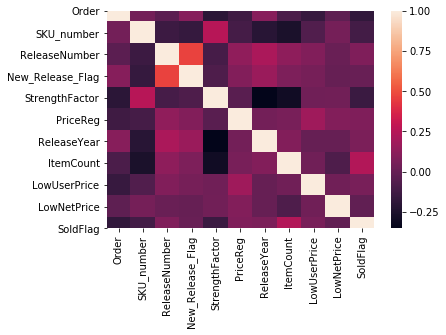

In [19]:
sns.heatmap(df.corr())

## Data preprocessing

In [20]:
df['File_Type'].unique()

array(['Historical'], dtype=object)

In [21]:
pdt_type={"Historical":1}
data=[train_df,test_df]
for x in data:
    x['File_Type']=x['File_Type'].map(pdt_type)

In [22]:
train_df

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,1,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,1,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,1,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,1,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,1,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,57924,1,3059530,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,22917,1,57540,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,12265,1,2471534,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,31440,1,567658,D,8,1,973353,105.95,2008,45,52.69,23.99,0


In [23]:
df['MarketingType'].unique()

array(['S', 'D'], dtype=object)

In [24]:
markets={"S":0,"D":1}
data=[train_df,test_df]
for x in data:
    x['MarketingType']=x['MarketingType'].map(markets)

In [25]:
df.head()

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [26]:
train_df.head()

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,1,266198,0,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,1,2405151,0,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,1,528384,1,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,1,571691,0,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,1,2363274,1,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [27]:
df['ReleaseNumber'].unique()

array([ 0,  9,  4,  1,  7,  5,  2,  3,  6, 10, 12,  8, 11, 13, 17, 24, 14,
       31, 19, 27, 18, 25, 15, 20, 38, 16, 53, 39, 21, 28, 49, 23, 35, 26,
       37, 41, 22, 30, 40, 29, 33, 44, 42, 50, 43, 32, 36, 99, 66, 58, 45,
       51, 52, 46, 82, 34, 97, 48], dtype=int64)

In [28]:
df['ReleaseNumber'].value_counts()

2     11278
3      7333
1      6715
4      5241
0      4550
5      4176
6      3336
7      2630
8      2057
9      1590
10     1243
11      853
12      602
13      440
14      247
15      182
16      110
17      106
18       87
19       66
20       58
21       51
22       28
25       26
24       22
23       17
27       14
28       13
26       12
30       12
35       12
31       10
29        8
32        7
38        6
40        6
34        6
43        5
41        5
33        5
37        5
36        4
49        4
44        3
50        2
39        2
82        1
42        1
51        1
99        1
52        1
53        1
66        1
58        1
97        1
48        1
46        1
45        1
Name: ReleaseNumber, dtype: int64

In [29]:
df['StrengthFactor'].unique()

array([1255901,  208404,   50339, ..., 6046130,  973353, 4138946],
      dtype=int64)

In [30]:
df['StrengthFactor'].value_counts()

3158      3
586672    3
12815     3
129992    3
29717     3
         ..
10030     1
1834      1
157478    1
32549     1
919553    1
Name: StrengthFactor, Length: 52505, dtype: int64

In [31]:
df['StrengthFactor'].describe()

count    5.319700e+04
mean     1.216757e+06
std      1.524907e+06
min      6.800000e+01
25%      2.432250e+05
50%      7.155000e+05
75%      1.552432e+06
max      1.666966e+07
Name: StrengthFactor, dtype: float64

In [32]:
df['PriceReg'].unique()

array([ 32.5 ,  70.  , 324.95, ...,  92.45,  11.81, 160.84])

In [33]:
df['PriceReg'].describe()

count    53197.000000
mean        99.004026
std         80.631333
min          0.000000
25%         49.950000
50%         78.950000
75%        127.950000
max       3986.310000
Name: PriceReg, dtype: float64

In [34]:
data = [train_df, test_df]

for x in data:
    x.loc[ x['PriceReg'] ==0, 'PriceReg'] = 0
    x.loc[(x['PriceReg'] > 0) & (x['PriceReg'] <= 50), 'PriceReg'] = 1
    x.loc[(x['PriceReg'] > 50) & (x['PriceReg'] <= 100), 'PriceReg'] = 2
    x.loc[(x['PriceReg'] > 100) & (x['PriceReg'] <= 200), 'PriceReg'] = 3
    x.loc[(x['PriceReg'] > 200) & (x['PriceReg'] <= 4000), 'PriceReg'] = 4
    x['PriceReg'] = x['PriceReg'].astype(int)

In [35]:
df['PriceReg'].value_counts()

0.00      976
49.95     727
39.95     566
49.99     503
59.95     497
         ... 
69.92       1
57.87       1
143.99      1
103.53      1
117.61      1
Name: PriceReg, Length: 7464, dtype: int64

In [36]:
train_df.head()

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,1,266198,0,0,0,1255901,1,2004,26,27.57,10.99,0
1,82447,1,2405151,0,0,0,208404,2,1988,21,15.99,40.02,1
2,31672,1,528384,1,9,1,50339,4,2013,53,149.73,123.94,0
3,71808,1,571691,0,4,1,1361255,1,2005,67,10.59,7.59,0
4,9256,1,2363274,1,1,0,3760024,3,2004,13,43.94,33.99,0


In [37]:
train_df['PriceReg'].value_counts()

2    19214
3    14288
1    13726
4     4993
0      976
Name: PriceReg, dtype: int64

In [38]:
df['ReleaseYear'].unique()

array([2004, 1988, 2013, 2005, 2010, 2009, 2003, 1999, 2006, 2002, 2000,
       2011, 1991, 1997, 1990, 2008, 2012, 1975, 1998, 2014, 1992, 2001,
       2007, 1994, 1996, 1984, 1989, 1986, 1982, 1983, 1993, 1995, 2015,
       1980, 1971, 1973, 1979, 1985, 1966, 1969, 2016, 1976, 1958, 1987,
       1959, 1972, 1963, 1967, 1965, 1970, 1964, 1950, 1978, 1977, 1974,
       1981, 1968, 1962, 1954, 1945, 1956, 1960, 1952, 1953, 1955, 1961],
      dtype=int64)

In [39]:
df['ReleaseYear'].value_counts()

2010    4367
2008    4200
2009    4126
2007    4064
2006    3899
        ... 
1955       1
1954       1
1964       1
1953       1
1945       1
Name: ReleaseYear, Length: 66, dtype: int64

In [40]:
df['ItemCount'].unique()

array([  26,   21,   53,   67,   13,   50,   14,   29,   42,   20,   39,
         23,   25,   35,   61,   91,   15,   22,   44,   46,   82,   12,
         36,   18,   17,   37,   19,   94,  101,   24,   55,  107,   64,
         78,   59,   54,   33,  140,   41,   16,   30,   51,   70,   52,
         31,   38,   56,  108,   27,   68,  245,   47,   28,   84,   72,
         97,   43,  104,  171,   48,   73,  363,   11,  304,   34,   58,
         40,   76,   69,   49,   62,  146,  161,   66,   88,  102,   95,
        100,  169,   80,  281,   85,   83,   74,   79,  150,  129,   32,
         96,   71,   87,  120,  106,  110,  155,  135,    7,  136,  103,
        222,   57,  114,  111,   65,   60,  127,  115,  174,   75,  126,
        172,  194,  133,   63,   86,  177,   90,  113,    0,   92,  124,
         98,  116,   45,  167,  214,  128,  223,  152,  121,   10,    8,
         77,   99,  125,   89,    9,   81,  122,  112,  139,  265,  117,
         93,  145,  151,  168,  109,  616,  132,   

In [41]:
df['LowUserPrice'].unique()
df['LowUserPrice'].describe()

array([ 27.57,  15.99, 149.73, ..., 155.15,  73.18, 253.92])

count    53197.000000
mean        56.455537
std         99.006290
min          0.000000
25%         20.190000
50%         44.000000
75%         79.590000
max      14140.210000
Name: LowUserPrice, dtype: float64

In [42]:
df['LowNetPrice'].unique()
df['LowNetPrice'].describe()

array([ 10.99,  40.02, 123.94, ...,  61.92,  94.66,  99.76])

count    53197.000000
mean        47.335423
std        139.049743
min          0.000000
25%         18.710000
50%         36.080000
75%         56.980000
max      19138.790000
Name: LowNetPrice, dtype: float64

In [43]:
train_df.drop(['Order'],axis=1,inplace=True)
test_df.drop(['Order'],axis=1,inplace=True)

### Data Analysis

In [44]:
train_df.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,1,266198,0,0,0,1255901,1,2004,26,27.57,10.99,0
1,1,2405151,0,0,0,208404,2,1988,21,15.99,40.02,1
2,1,528384,1,9,1,50339,4,2013,53,149.73,123.94,0
3,1,571691,0,4,1,1361255,1,2005,67,10.59,7.59,0
4,1,2363274,1,1,0,3760024,3,2004,13,43.94,33.99,0


In [45]:
train_df.drop(['ReleaseYear'],axis=1,inplace=True)
test_df.drop(['ReleaseYear'],axis=1,inplace=True)

In [46]:
train_df.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,1,266198,0,0,0,1255901,1,26,27.57,10.99,0
1,1,2405151,0,0,0,208404,2,21,15.99,40.02,1
2,1,528384,1,9,1,50339,4,53,149.73,123.94,0
3,1,571691,0,4,1,1361255,1,67,10.59,7.59,0
4,1,2363274,1,1,0,3760024,3,13,43.94,33.99,0


In [47]:
test_df.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,1,114538,0,2,1,1349864,3,25,16.24,10.94
1,1,259365,1,6,1,410348,2,51,127.72,29.94
2,1,147658,0,1,0,92099,2,20,0.00,0.00
3,1,148208,0,5,1,801001,3,21,4.33,86.83
4,1,124687,1,2,1,1051302,2,60,26.80,28.99


In [48]:
train_df['SoldFlag'].value_counts()

0    44100
1     9097
Name: SoldFlag, dtype: int64

In [49]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#x, y = oversample.fit_resample(x_train,y_train.ravel())

In [50]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


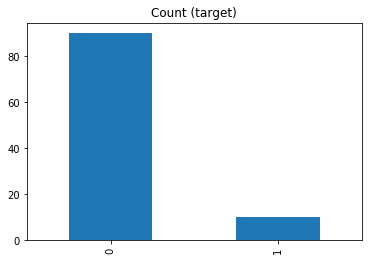

In [51]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df5 = pd.DataFrame(X)
df5['SoldFlag'] = y
df5['SoldFlag'].value_counts().plot(kind='bar', title='Count (target)');

In [52]:
min_max_scaler = MinMaxScaler()
normalized_X = min_max_scaler.fit_transform((train_df.drop('SoldFlag',axis=1)))
df2=pd.DataFrame(normalized_X)
df2

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.055296,0.0,0.000000,0.0,0.075337,0.25,0.018233,0.001950,0.000574
1,0.0,0.602366,0.0,0.000000,0.0,0.012498,0.50,0.014727,0.001131,0.002091
2,0.0,0.122354,1.0,0.090909,1.0,0.003016,1.00,0.037167,0.010589,0.006476
3,0.0,0.133430,0.0,0.040404,1.0,0.081657,0.25,0.046985,0.000749,0.000397
4,0.0,0.591656,1.0,0.010101,0.0,0.225558,0.75,0.009116,0.003107,0.001776
...,...,...,...,...,...,...,...,...,...,...
53192,0.0,0.769734,0.0,0.000000,0.0,0.036441,0.50,0.015428,0.017957,0.005212
53193,0.0,0.001928,1.0,0.111111,1.0,0.021735,0.25,0.061010,0.006646,0.000991
53194,0.0,0.619345,1.0,0.020202,1.0,0.362700,0.25,0.011220,0.000000,0.001697
53195,0.0,0.132399,1.0,0.080808,1.0,0.058387,0.75,0.031557,0.003726,0.001253


In [53]:
train_df.columns

Index(['File_Type', 'SKU_number', 'MarketingType', 'ReleaseNumber',
       'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ItemCount',
       'LowUserPrice', 'LowNetPrice', 'SoldFlag'],
      dtype='object')

In [54]:
df2.columns=['File_Type', 'SKU_number', 'MarketingType', 'ReleaseNumber',
       'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ItemCount',
       'LowUserPrice', 'LowNetPrice']
df2['Target'] = train_df['SoldFlag']
df2.head()


,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,Target
0,0.0,0.055296,0.0,0.000000,0.0,0.075337,0.25,0.018233,0.001950,0.000574,0
1,0.0,0.602366,0.0,0.000000,0.0,0.012498,0.50,0.014727,0.001131,0.002091,1
2,0.0,0.122354,1.0,0.090909,1.0,0.003016,1.00,0.037167,0.010589,0.006476,0
3,0.0,0.133430,0.0,0.040404,1.0,0.081657,0.25,0.046985,0.000749,0.000397,0
4,0.0,0.591656,1.0,0.010101,0.0,0.225558,0.75,0.009116,0.003107,0.001776,0


In [55]:
x_train=train_df.drop(['SoldFlag'],axis=1)
y_train=train_df['SoldFlag']
x_test=test_df.copy()

In [56]:

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
 
sm = SMOTE() 
x_resample,y_resample = sm.fit_sample(x_train,y_train) 

C:\Users\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The co

In [57]:
x_resample,y_resample

(array([[1.00000000e+00, 2.66198000e+05, 0.00000000e+00, ...,
         2.60000000e+01, 2.75700000e+01, 1.09900000e+01],
        [1.00000000e+00, 2.40515100e+06, 0.00000000e+00, ...,
         2.10000000e+01, 1.59900000e+01, 4.00200000e+01],
        [1.00000000e+00, 5.28384000e+05, 1.00000000e+00, ...,
         5.30000000e+01, 1.49730000e+02, 1.23940000e+02],
        ...,
        [1.00000000e+00, 1.65050824e+05, 1.00000000e+00, ...,
         5.47875923e+01, 1.17309347e+02, 3.12465481e+01],
        [1.00000000e+00, 5.44417883e+05, 1.00000000e+00, ...,
         5.67850100e+01, 1.24058872e+02, 1.02556241e+02],
        [1.00000000e+00, 5.20349324e+04, 9.91320373e-01, ...,
         4.38437667e+01, 7.03366506e+00, 1.05812698e+01]]),
 array([0, 1, 0, ..., 1, 1, 1], dtype=int64))

In [58]:
x_resample.shape,y_resample.shape

((88200, 10), (88200,))

In [59]:
df2['Target'].value_counts()

0    44100
1     9097
Name: Target, dtype: int64

In [60]:
train_df['SoldFlag'].value_counts()

0    44100
1     9097
Name: SoldFlag, dtype: int64

In [61]:
x_train
x_resample
train_df

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,1,266198,0,0,0,1255901,1,26,27.57,10.99
1,1,2405151,0,0,0,208404,2,21,15.99,40.02
2,1,528384,1,9,1,50339,4,53,149.73,123.94
3,1,571691,0,4,1,1361255,1,67,10.59,7.59
4,1,2363274,1,1,0,3760024,3,13,43.94,33.99
...,...,...,...,...,...,...,...,...,...,...
53192,1,3059530,0,0,0,607526,2,22,253.92,99.76
53193,1,57540,1,11,1,362378,1,87,93.98,18.97
53194,1,2471534,1,2,1,6046130,1,16,0.00,32.48
53195,1,567658,1,8,1,973353,3,45,52.69,23.99


array([[1.00000000e+00, 2.66198000e+05, 0.00000000e+00, ...,
        2.60000000e+01, 2.75700000e+01, 1.09900000e+01],
       [1.00000000e+00, 2.40515100e+06, 0.00000000e+00, ...,
        2.10000000e+01, 1.59900000e+01, 4.00200000e+01],
       [1.00000000e+00, 5.28384000e+05, 1.00000000e+00, ...,
        5.30000000e+01, 1.49730000e+02, 1.23940000e+02],
       ...,
       [1.00000000e+00, 1.65050824e+05, 1.00000000e+00, ...,
        5.47875923e+01, 1.17309347e+02, 3.12465481e+01],
       [1.00000000e+00, 5.44417883e+05, 1.00000000e+00, ...,
        5.67850100e+01, 1.24058872e+02, 1.02556241e+02],
       [1.00000000e+00, 5.20349324e+04, 9.91320373e-01, ...,
        4.38437667e+01, 7.03366506e+00, 1.05812698e+01]])

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,1,266198,0,0,0,1255901,1,26,27.57,10.99,0
1,1,2405151,0,0,0,208404,2,21,15.99,40.02,1
2,1,528384,1,9,1,50339,4,53,149.73,123.94,0
3,1,571691,0,4,1,1361255,1,67,10.59,7.59,0
4,1,2363274,1,1,0,3760024,3,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...,...
53192,1,3059530,0,0,0,607526,2,22,253.92,99.76,0
53193,1,57540,1,11,1,362378,1,87,93.98,18.97,1
53194,1,2471534,1,2,1,6046130,1,16,0.00,32.48,0
53195,1,567658,1,8,1,973353,3,45,52.69,23.99,0


In [62]:
train_df.shape

(53197, 11)

In [63]:
x_resample.shape,y_resample.shape

((88200, 10), (88200,))

In [64]:
x_resample

array([[1.00000000e+00, 2.66198000e+05, 0.00000000e+00, ...,
        2.60000000e+01, 2.75700000e+01, 1.09900000e+01],
       [1.00000000e+00, 2.40515100e+06, 0.00000000e+00, ...,
        2.10000000e+01, 1.59900000e+01, 4.00200000e+01],
       [1.00000000e+00, 5.28384000e+05, 1.00000000e+00, ...,
        5.30000000e+01, 1.49730000e+02, 1.23940000e+02],
       ...,
       [1.00000000e+00, 1.65050824e+05, 1.00000000e+00, ...,
        5.47875923e+01, 1.17309347e+02, 3.12465481e+01],
       [1.00000000e+00, 5.44417883e+05, 1.00000000e+00, ...,
        5.67850100e+01, 1.24058872e+02, 1.02556241e+02],
       [1.00000000e+00, 5.20349324e+04, 9.91320373e-01, ...,
        4.38437667e+01, 7.03366506e+00, 1.05812698e+01]])

In [65]:
x_train.columns

Index(['File_Type', 'SKU_number', 'MarketingType', 'ReleaseNumber',
       'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ItemCount',
       'LowUserPrice', 'LowNetPrice'],
      dtype='object')

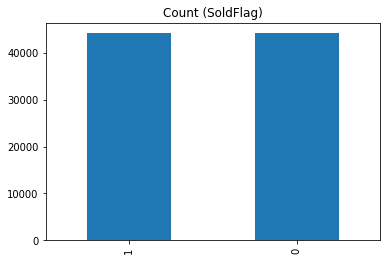

In [66]:
dfm = pd.DataFrame(x_resample, columns=x_train.columns)
dfm['SoldFlag'] = y_resample

dfm['SoldFlag'].value_counts().plot(kind='bar', title='Count (SoldFlag)');

In [67]:
dfm.head()
dfm.shape

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,1.0,266198.0,0.0,0.0,0.0,1255901.0,1.0,26.0,27.57,10.99,0
1,1.0,2405151.0,0.0,0.0,0.0,208404.0,2.0,21.0,15.99,40.02,1
2,1.0,528384.0,1.0,9.0,1.0,50339.0,4.0,53.0,149.73,123.94,0
3,1.0,571691.0,0.0,4.0,1.0,1361255.0,1.0,67.0,10.59,7.59,0
4,1.0,2363274.0,1.0,1.0,0.0,3760024.0,3.0,13.0,43.94,33.99,0


(88200, 11)

## Building ML models

In [68]:
dfmx_train=dfm.drop(['SoldFlag'],axis=1)
dfmy_train=dfm['SoldFlag']
dfmx_test=test_df.copy()

In [69]:
dfmx_train.head()
dfmx_test.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,1.0,266198.0,0.0,0.0,0.0,1255901.0,1.0,26.0,27.57,10.99
1,1.0,2405151.0,0.0,0.0,0.0,208404.0,2.0,21.0,15.99,40.02
2,1.0,528384.0,1.0,9.0,1.0,50339.0,4.0,53.0,149.73,123.94
3,1.0,571691.0,0.0,4.0,1.0,1361255.0,1.0,67.0,10.59,7.59
4,1.0,2363274.0,1.0,1.0,0.0,3760024.0,3.0,13.0,43.94,33.99


,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,1,114538,0,2,1,1349864,3,25,16.24,10.94
1,1,259365,1,6,1,410348,2,51,127.72,29.94
2,1,147658,0,1,0,92099,2,20,0.00,0.00
3,1,148208,0,5,1,801001,3,21,4.33,86.83
4,1,124687,1,2,1,1051302,2,60,26.80,28.99


In [70]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log1 = round(logreg.score(x_train, y_train) * 100, 2)
print(round(acc_log1,2,), "%")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

82.9 %


In [71]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(dfmx_train, dfmy_train)

dfmy_pred = logreg.predict(dfmx_test)

acc_log = round(logreg.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_log,2,), "%")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

50.0 %


In [72]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(dfmx_train, dfmy_train)
dfmy_pred = sgd.predict(dfmx_test)

sgd.score(dfmx_train, dfmy_train)

acc_sgd = round(sgd.score(dfmx_train, dfmy_train) * 100, 2)


print(round(acc_sgd,2,), "%")

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.5

50.0 %


In [73]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn1 = round(knn.score(x_train, y_train) * 100, 2)
print(round(acc_knn1,2,), "%")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

86.89 %


In [74]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(dfmx_train, dfmy_train)

dfmy_pred = knn.predict(dfmx_test)

acc_knn = round(knn.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_knn,2,), "%")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

87.05 %


In [75]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(dfmx_train, dfmy_train)

dfmy_pred = gaussian.predict(dfmx_test)

acc_gaussian = round(gaussian.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

GaussianNB(priors=None, var_smoothing=1e-09)

57.2 %


In [76]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(dfmx_train, dfmy_train)
dfmy_pred = sgd.predict(dfmx_test)

sgd.score(dfmx_train, dfmy_train)

acc_sgd = round(sgd.score(dfmx_train, dfmy_train) * 100, 2)


print(round(acc_sgd,2,), "%")

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.5

50.0 %


In [77]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(dfmx_train, dfmy_train)

dfmy_pred = decision_tree.predict(dfmx_test)

acc_decision_tree = round(decision_tree.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

100.0 %


In [78]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest1 = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest1,2,), "%")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9999624038949565

100.0 %


In [79]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(dfmx_train, dfmy_train)

dfmy_prediction = random_forest.predict(dfmx_test)

random_forest.score(dfmx_train, dfmy_train)
acc_random_forest = round(random_forest.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9999773242630385

100.0 %


In [80]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc1 = round(linear_svc.score(x_train, y_train) * 100, 2)
print(round(acc_linear_svc1,2,), "%")

C:\Users\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

82.97 %


In [81]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(dfmx_train, dfmy_train)

dfmy_pred = linear_svc.predict(dfmx_test)

acc_linear_svc = round(linear_svc.score(dfmx_train, dfmy_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

C:\Users\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

50.0 %


In [82]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
87.05,KNN
57.20,Naive Bayes
50.00,Support Vector Machines
50.00,Logistic Regression
50.00,Stochastic Gradient Decent


### Cross-validation

In [83]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, dfmx_train, dfmy_train, cv=10, scoring = "accuracy")

In [84]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.61292517 0.6154195  0.9414966  0.95861678 0.96145125 0.95623583
 0.9569161  0.95884354 0.95680272 0.95748299]
Mean: 0.8876190476190476
Standard Deviation: 0.13681907949132005


### Feature importance

In [85]:
importances = pd.DataFrame({'feature':dfmx_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [86]:
importances

,importance
feature,
MarketingType,0.222
PriceReg,0.136
ItemCount,0.134
StrengthFactor,0.107
ReleaseNumber,0.094
LowUserPrice,0.090
SKU_number,0.083
LowNetPrice,0.076
New_Release_Flag,0.058


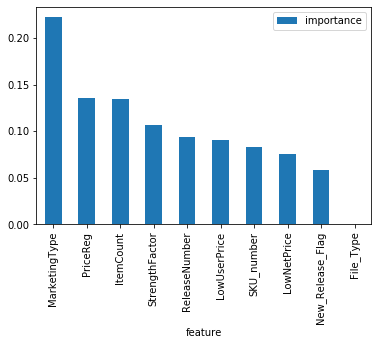

In [87]:
importances.plot.bar()

In [88]:
dfmx_train.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,1.0,266198.0,0.0,0.0,0.0,1255901.0,1.0,26.0,27.57,10.99
1,1.0,2405151.0,0.0,0.0,0.0,208404.0,2.0,21.0,15.99,40.02
2,1.0,528384.0,1.0,9.0,1.0,50339.0,4.0,53.0,149.73,123.94
3,1.0,571691.0,0.0,4.0,1.0,1361255.0,1.0,67.0,10.59,7.59
4,1.0,2363274.0,1.0,1.0,0.0,3760024.0,3.0,13.0,43.94,33.99


In [89]:
dfmx_train.drop(['File_Type'],axis=1,inplace=True)
dfmx_test.drop(['File_Type'],axis=1,inplace=True)

In [90]:
dfm.head()
dfmx_test.head()

,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,1.0,266198.0,0.0,0.0,0.0,1255901.0,1.0,26.0,27.57,10.99,0
1,1.0,2405151.0,0.0,0.0,0.0,208404.0,2.0,21.0,15.99,40.02,1
2,1.0,528384.0,1.0,9.0,1.0,50339.0,4.0,53.0,149.73,123.94,0
3,1.0,571691.0,0.0,4.0,1.0,1361255.0,1.0,67.0,10.59,7.59,0
4,1.0,2363274.0,1.0,1.0,0.0,3760024.0,3.0,13.0,43.94,33.99,0


,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,114538,0,2,1,1349864,3,25,16.24,10.94
1,259365,1,6,1,410348,2,51,127.72,29.94
2,147658,0,1,0,92099,2,20,0.00,0.00
3,148208,0,5,1,801001,3,21,4.33,86.83
4,124687,1,2,1,1051302,2,60,26.80,28.99


### Hyperparameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100,random_state=1)

In [125]:
param_grid = [{ "criterion" : ["gini", "entropy"],"max_features": ['auto', 'sqrt', 'log2'], 'max_depth':[10,15],"n_estimators": [10,20,30]}]


In [126]:
clf = GridSearchCV(estimator=rf, param_grid=param_grid,cv=10)

clf.fit(dfmx_train, dfmy_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                  

In [128]:
clf.best_score_

0.8734920634920634

In [127]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 30}

In [129]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [135]:
clf.n_splits_

10

In [136]:
dfmx_train.shape,dfmy_train.shape,dfmx_test.shape

((88200, 9), (88200,), (22799, 9))

In [144]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,
                                       #max_depth=15,
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(dfmx_train, dfmy_train)
dfmy_prediction = random_forest.predict(dfmx_test)

random_forest.score(dfmx_train, dfmy_train)
print("Random forset accuracy:",round(random_forest.score(dfmx_train,dfmy_train),2)*100,"%")

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

0.9685487528344672

Random forset accuracy: 97.0 %
oob score: 89.09 %


## Evaluation

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, dfmx_train, dfmy_train, cv=3)
confusion_matrix(dfmy_train, predictions)

array([[40931,  3169],
       [ 8881, 35219]], dtype=int64)

In [146]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(dfmy_train, predictions))
print("Recall:",recall_score(dfmy_train, predictions))

Precision: 0.9174481608836095
Recall: 0.7986167800453515


In [147]:
from sklearn.metrics import f1_score
f1_score(dfmy_train, predictions)

0.8539181456696732

In [148]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(dfmx_test)
y_scores = y_scores[:,1]

In [149]:
y_scores

array([0.12254034, 0.41431766, 0.1200951 , ..., 0.16927593, 0.08432551,
       0.19290238])

<Figure size 1008x504 with 0 Axes>

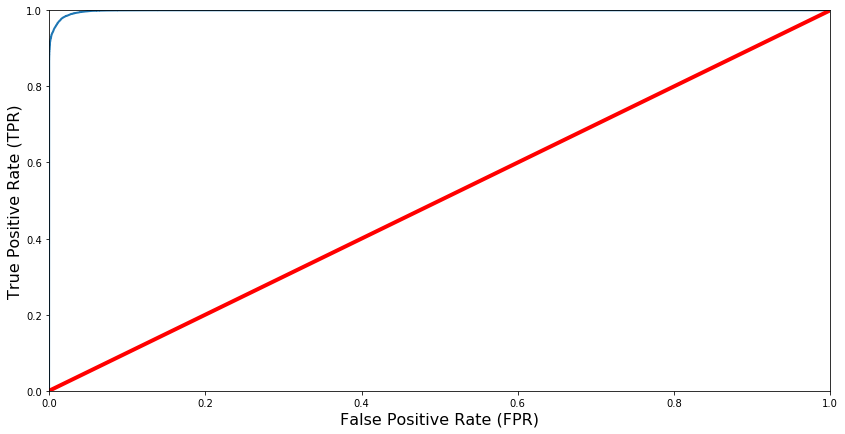

In [150]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [151]:
y_pred=random_forest.predict(dfmx_test)
y_pred_prob=random_forest.predict_proba(dfmx_test)

In [152]:
y_pred
y_pred_prob
y_pred.shape

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([[0.87745966, 0.12254034],
       [0.58568234, 0.41431766],
       [0.8799049 , 0.1200951 ],
       ...,
       [0.83072407, 0.16927593],
       [0.91567449, 0.08432551],
       [0.80709762, 0.19290238]])

(22799,)

In [155]:
dfmx_test['SoldFlag']=pd.DataFrame(y_pred)
dfmx_test

,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,114538,0,2,1,1349864,3,25,16.24,10.94,0
1,259365,1,6,1,410348,2,51,127.72,29.94,0
2,147658,0,1,0,92099,2,20,0.00,0.00,0
3,148208,0,5,1,801001,3,21,4.33,86.83,0
4,124687,1,2,1,1051302,2,60,26.80,28.99,0
...,...,...,...,...,...,...,...,...,...,...
22794,663930,0,18,1,18044,3,44,41.99,58.52,1
22795,544565,1,10,1,9876,4,113,120.17,79.27,1
22796,2404633,0,1,0,778672,2,59,0.00,32.24,0
22797,877289,0,4,1,4947423,1,47,129.31,11.53,0


In [157]:
#import innomatics
#innomatics.classification_metric(dfmxy_train,y_pred,y_pred_prob[:,1],label=['no','yes'],verbose=True)

In [156]:
#write output to csv

dfmx_test.to_csv("SoldFlag.csv", index = False)